# Konten

1. Overview Project
2. Import Data & Library
3. Analisa Data Eksploratif (EDA)
   
   3.1 Churn vs Non-Churn 
   
   
4. Membangun Model Prediksi

   4.1 Logistic Regression
   
   4.2 Randpm Forest


5. Membuat klaster pengguna
6. Kesimpulan
7. Rekomendasi

# Overview Project 
Waralaba pusat kebugaran bernama Model Fitness sedang mengembangkan strategi keterlibatan pelanggan berdasarkan data analitik yang mereka himpun. Permasalahan yang sering muncul ialah bisnis kesulitan mengetahui apakah pelanggan sudah berhenti berlangganan dengan layanan fitness bisnis tersebut. Tujuan dari project ini adalah untuk menganalisis profil para pelanggan tersebut dan mengembangkan strategi retensi pelanggan (customer retention)

Hal yang akan dicapai ialah 
1. Mempelajari cara memprediksi probabilitas churn (untuk bulan berikutnya) bagi setiap pelanggan
2. Membuat segmentasi pengguna dengan memilih kelompok yang paling dominan dan mendeskripsikan fitur-fitur utamanya
3. Menganalisis faktor yang paling memengaruhi churn
4. Mengidentifikasi kelompok yang ditargetkan
5. Merekomendasikan langkah-langkah untuk mengurangi churn
6. Mendeskripsikan pola lain yang kamu temui terkait interaksi pelanggan

# Import Data & Library

In [1]:
import pandas as pd 
import numpy as np 
import datetime as dt 
import math as mth
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
from plotly import graph_objects as go

In [2]:
df = pd.read_csv('/datasets/gym_churn_us.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


# Analisis data eksploratif (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Insight 1 :
1. Datasets terdiri dari 4000 baris dengan 14 kolom
2. Tidak ada dari datasets memiliki missing value
3. Penulisan nama kolom tidak seragam 

Hal yang dilakukan:
1. Menyeragamkan penulisan nama kolom

In [4]:
#cek missing value 
df.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [5]:
#cek duplikasi
df.duplicated().sum()

0

insight 2
1. Tidak ada missing value 
2. Tidak ada duplikasi data

In [6]:
#menyeragamkan penulisan nama kolom
df.columns = df.columns.str.casefold()
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [7]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


asumsi : 
  1. secara keseluruhan: nilai 1 = Ya ; nilai 0 = Tidak 
  2. secara gender: nilai 1 = Laki-laki ; nilai 0 = Perempuan

Hasil insight 3
   1. 84% pelanggan fitness tinggal atau kerja dekat dengan lokasi fitness
   2. 48% pelanggan fitness yang merupakan partner kerja dari business fitness 
   3. 30,8% pelanggan fitness yang menggunakan promo teman untuk bergabung dengan bisnis fitness 
   4. 90% pelanggan fitness memberikan nomor telefonnya ke bisniss fitness 
   5. rata -rata pelanggan fitness menggunakan jasa bisniss 4-5 bulan 
   6. 41% pelanggan fitness yang ikut serta dalam kegiatan kelompok 
   7. rata-rata pelanggan fitness berumur 29 tahun 
   8. rata-rata pelanggan bisnis mengeluarkan 146,9 uang yang dikeluarkan untuk membayar layanan lain di pusat fitness
   9. rata-rata pelanggan memiliki sisa 4 bulan sebelum kontrak layanan yang dipilih habis 
   10. rata-rata pelanggan fitness sudah menggunakan jasa fitness selama 3.7 bulan 
   11. rata-rata pelanggan fitness sudah menghadiri 1.8 kali kunjungan kelas per minggu selama masa hidup (lifetime) pelanggan
   12. rata-rata pelanggan fitness sudah menghadiri 1.7 kali kunjungan kelas per minggu sepanjang bulan yang sedang berjalan
   13. 26% dari total pelanggan fitness pada bulan sebelumnya yang berhenti langgan dengan bisnis

In [8]:
biner_feature = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits','churn']
list(enumerate(biner_feature))

[(0, 'gender'),
 (1, 'near_location'),
 (2, 'partner'),
 (3, 'promo_friends'),
 (4, 'phone'),
 (5, 'group_visits'),
 (6, 'churn')]

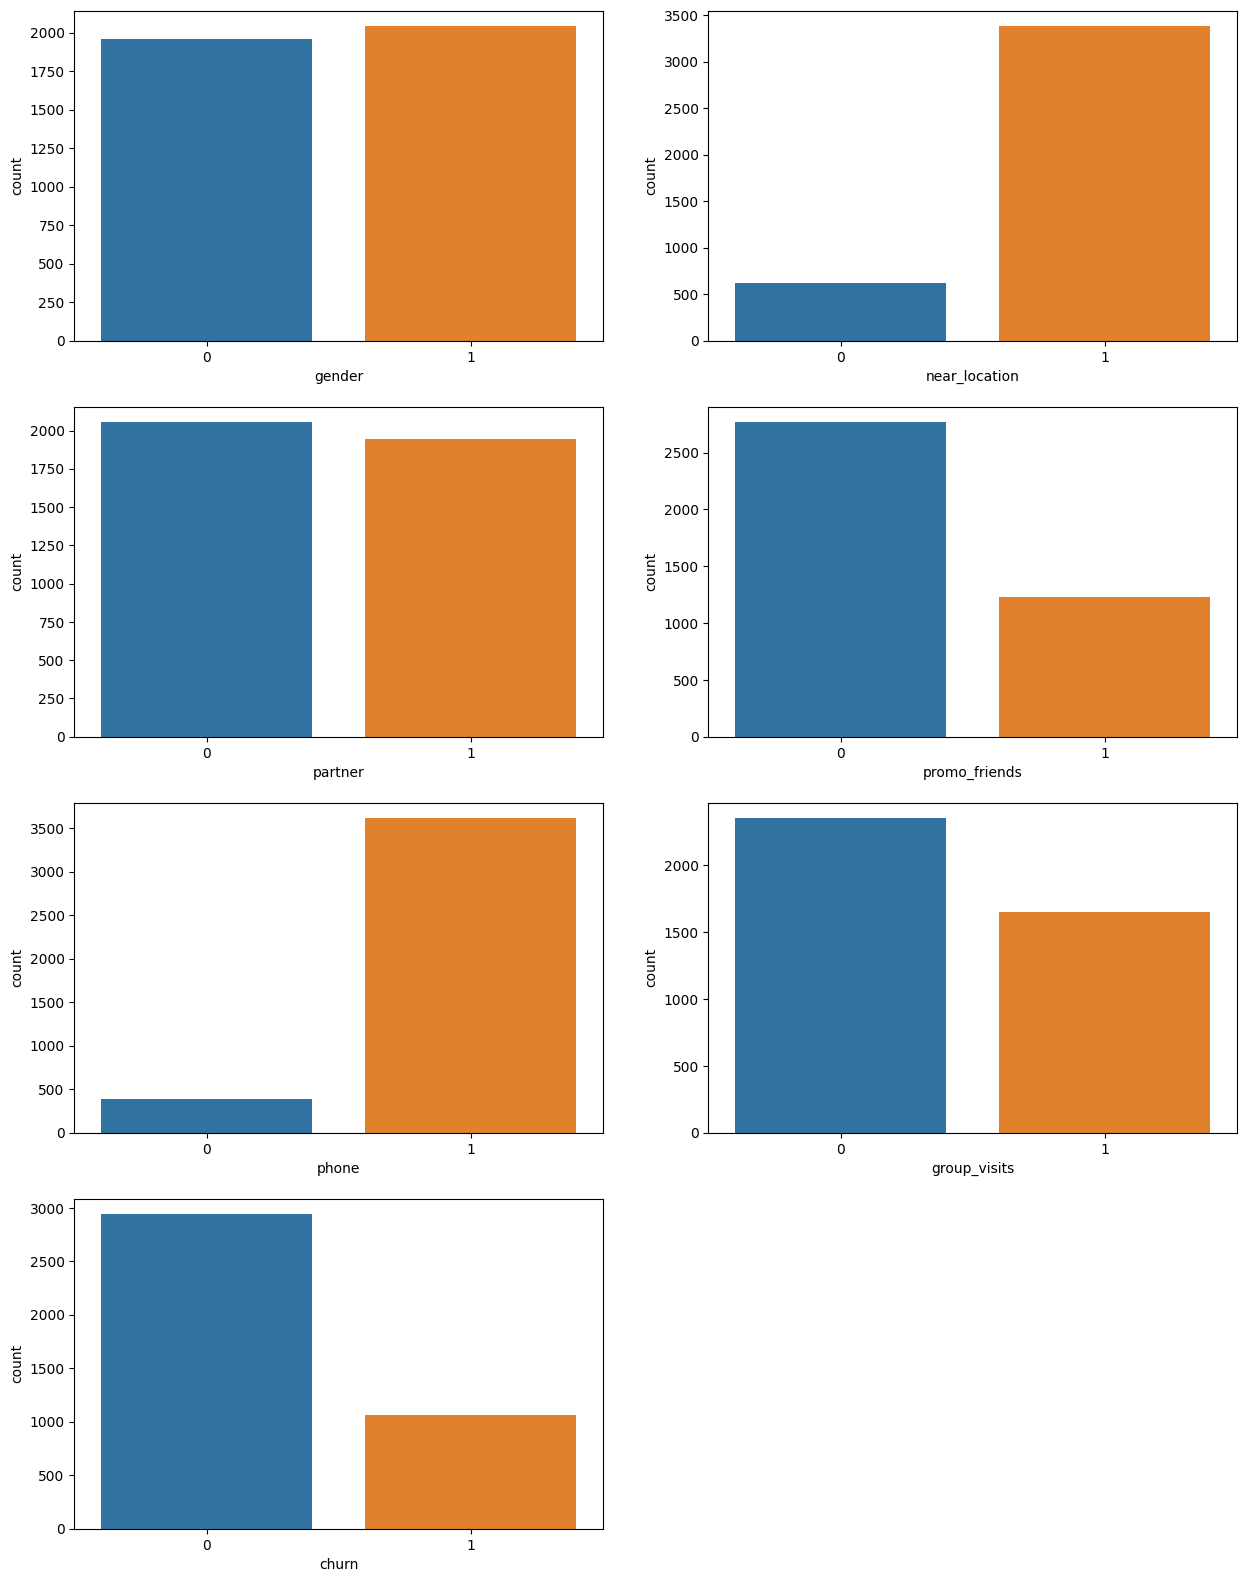

In [9]:
#count plot

plt.figure(figsize=(15,30))
for i in enumerate(biner_feature):
    plt.subplot(6,2,i[0]+1)
    sns.countplot(x=i[1], data=df)

insight 4 Explore Datasets
1. pelanggan fitness mayoritas laki-laki 
2. pelanggan fitness mayoritas memiliki tempat kerja atau tinggal di lokasi yang dekat dengan bisnis
3. selisih pelanggan non-business partner lebih dengan busienss parnert tidak signifikan, waluapun pelanggan non-business partner lebih banyak
4. diawal pendaftaran mayoritas pelanggan mendaftar tidak menggunakan promo friend
5. mayoritas pelanggan mencantumkan nomor telefon 
6. lebih banyak pelanggan yang tidak mengikuti kegiatan group 
7. mayoritas pelanggan fitness tetap lanjut berlangganan

In [10]:
displot_feature = df[['age','avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month','contract_period']]
displot_feature.sample()

,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,contract_period
239,31,14.899913,12.0,7,1.820575,1.805374,12


<Figure size 1500x1000 with 0 Axes>

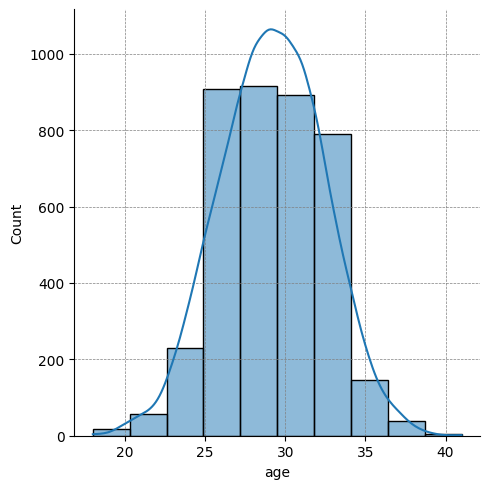

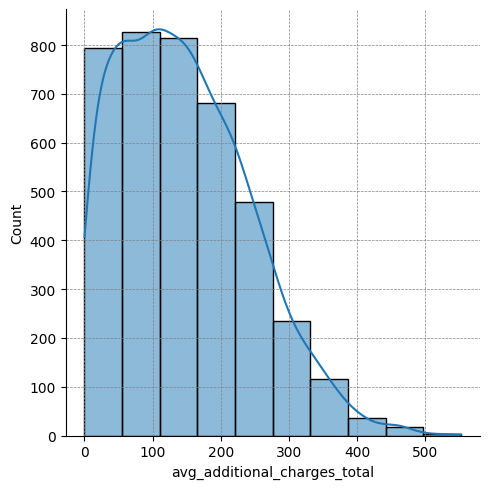

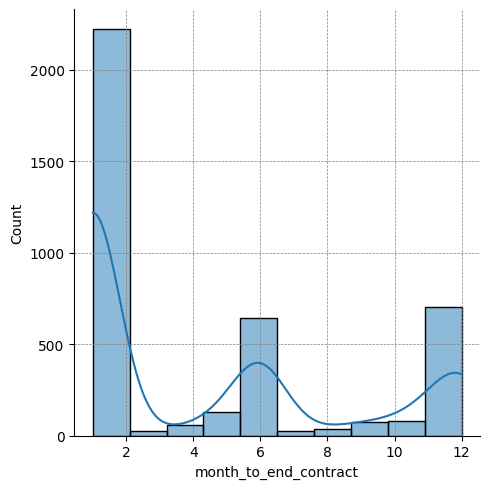

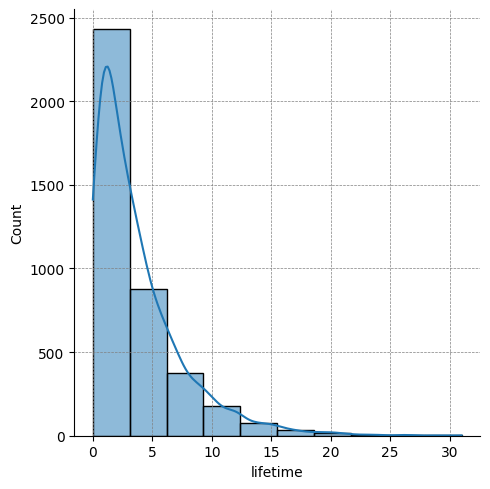

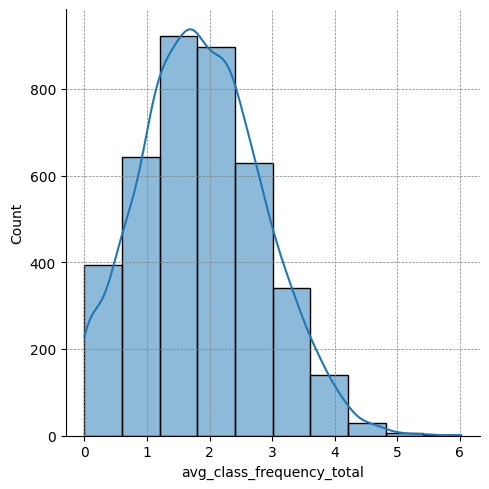

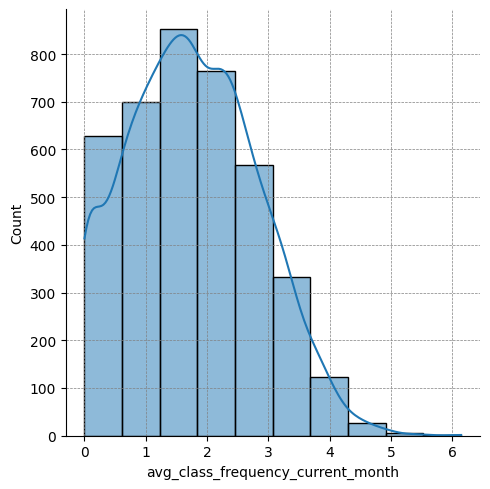

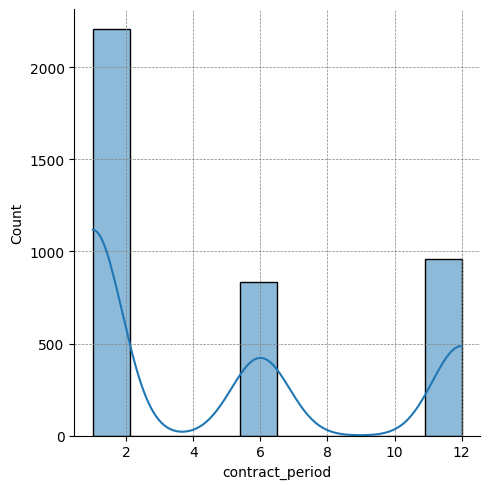

In [11]:
plt.figure(figsize=(15,10))
for feature in displot_feature.columns :
    sns.displot(displot_feature[feature], bins=10, kde=True)
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
    plt.show()

insight 5
1. mayoritas pelanggan fitnes berusia akhir tahun 20-an hingga umur 30 tahun 
2. mayoritas pelanggan fitness mengeluarkan uang tambahan kurang dari 100-an
3. mayoritas pelanggan memiliki sisa waktu habis kontrak 1 bulan 
4. mayoritas pelanggan fitness menghabiskan waktu 1 bulan di tempat fitness
5. lebih dari 800 pelanggan yang tercatat 1-2 kali kunjuan per minggu selama lifetime pelaanggan 
6. lebih dari 800 pelanggan yang tercatat 1-2 kali kunjuan per minggu selama bulan lalu  
7. mayoritas pelanggan mengambil skema kontrak 1 bulan (2000 orang lebih)

# Eksplorasi Data Stop Berlanggan (Churn) vs Lanjut Berlangganan

In [12]:
#jumlah pelanggan di kolom churn 
df.value_counts('churn')

churn
0    2939
1    1061
dtype: int64

In [13]:
#rata-rata
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


insight 6
1. lebih banyak pelanggan yang memperpanjang kontrak 
2. jenis kelamin terdistribusi hampir setara untuk kedua kelompok 
3. kedua kelompok mayoritas memiliki pelanggan yang berlokasi dekat dengan tempat fitness
4. kedua kelompok mayoritas memiliki pelanggan yang tidak menggunakan promo teman 
5. 53% dari pelanggan yang tetap melanjutkan kontrak termasuk dalam kategori business partner, hanya 35% dari pelanggan yang keluar merupakan kategori ini 
6. kedua kelompok, 90% diantara meletekan nomor hpnya 
7. rata-rata pelanggan yang masih lanjut memilih skenario 6 bulan kontrak, sedangkan yang sudah keluar memiliki skenario 1 bulan kontrak 
8. rata-rata pelanggan kedua kelompok tidak pernah mengikuti sesi kelompok
9. rata-rata pelanggan dari kelompok yang lanjut berusia 29 tahun sedangkan yang berhenti 26 tahun
10. rata-rata uang yang keluarkan untuk tambahan kelompok yang tetap lanjut jauh lebih tinggi dibandingkan dengan yang stop 
11. rata-rata masa pakai layanan fitness bagi yang lanjut adalah 4.7 bulan sedangkan yang stop 1 bulan
12. rata-rata selama masa hidup (lifetime) pelanggan yang masih lanjut melakukan 2 kali kunjungan per minggu, sedangkan pelanggan yang sudah stop melakukan 1 kali kunjuan perminggu. Hasil yang sama untuk rata-rata kunjungan per minggu sepanjang bulan lalu

# Grafik Pelaggan Aktif vs Pelanggan Stop (Churn)

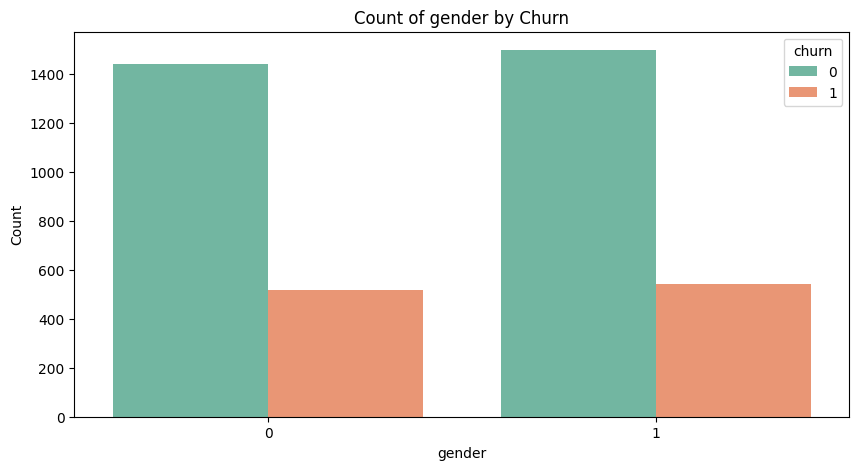

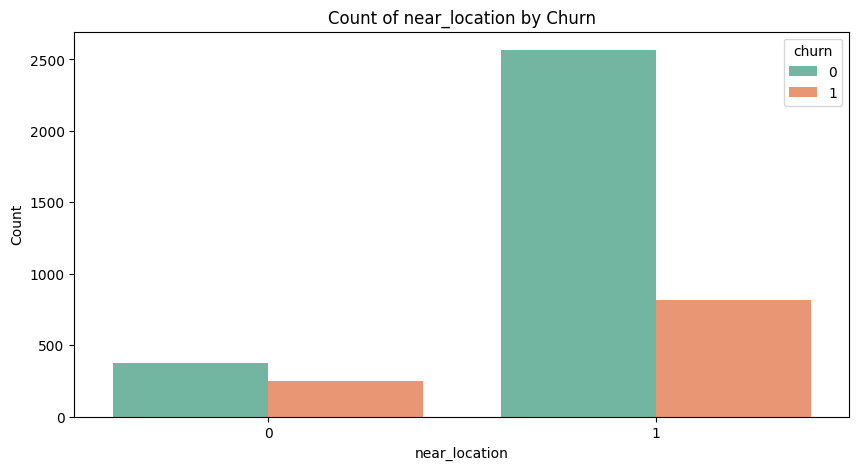

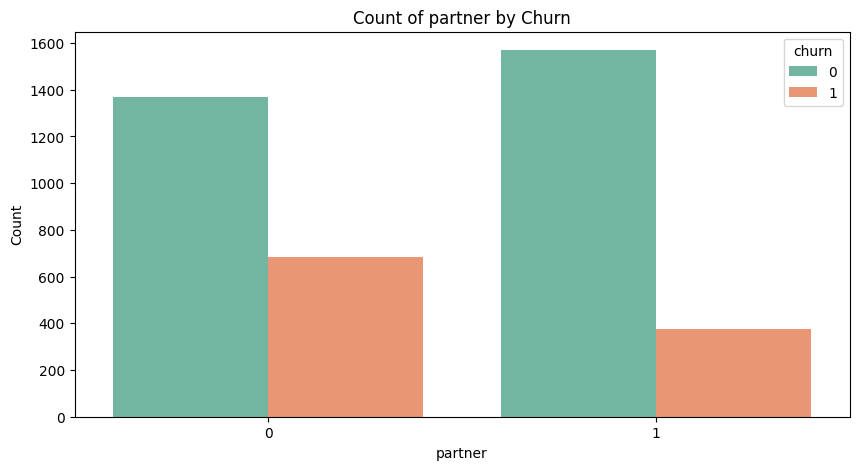

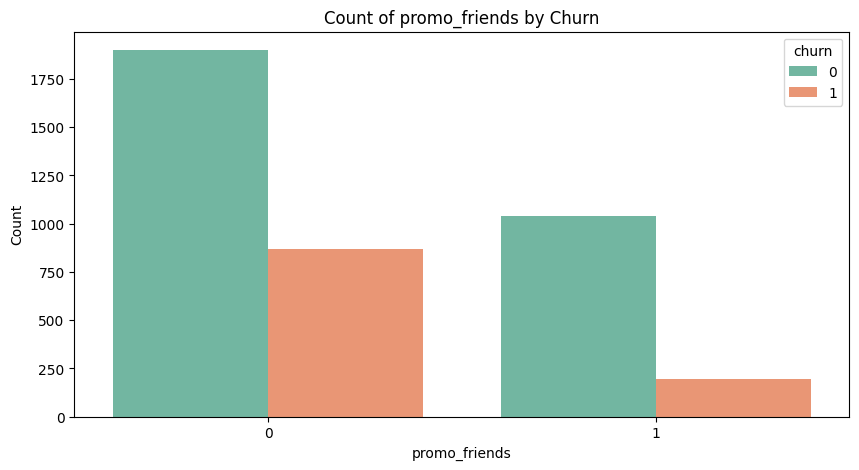

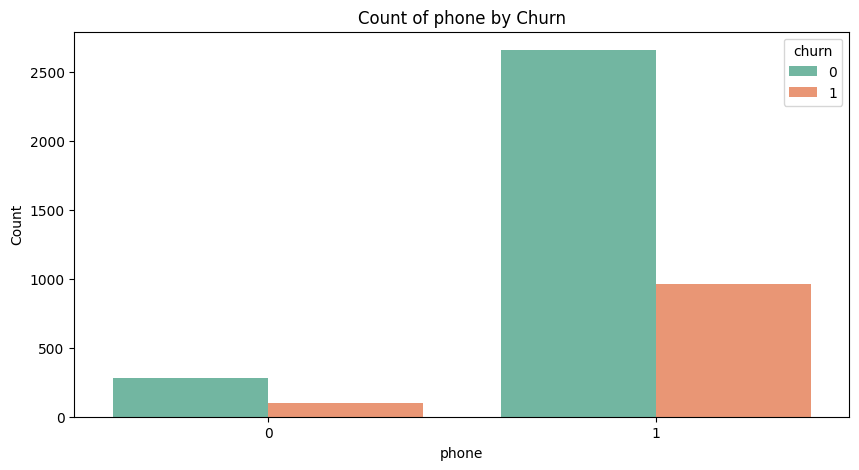

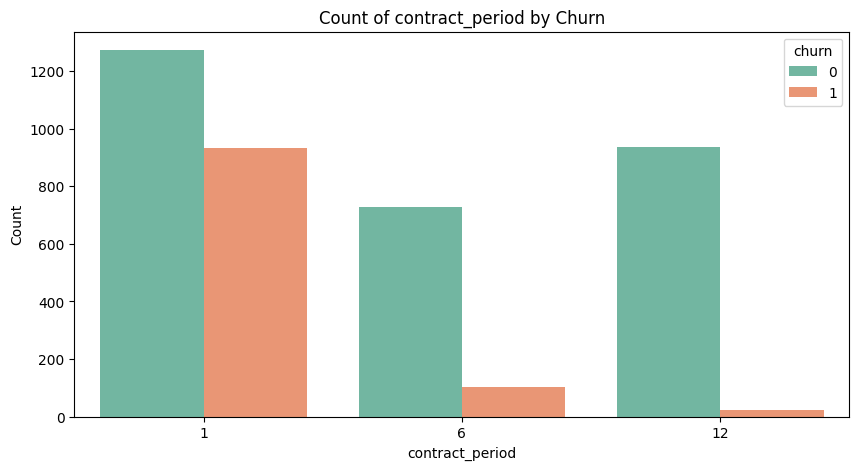

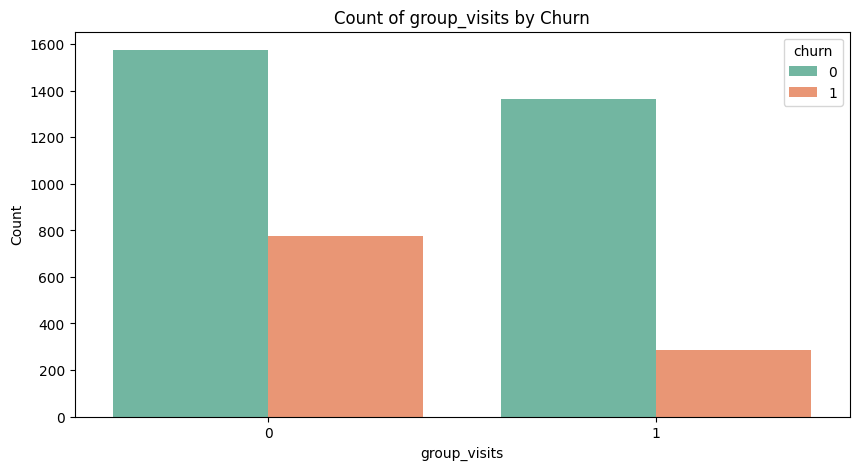

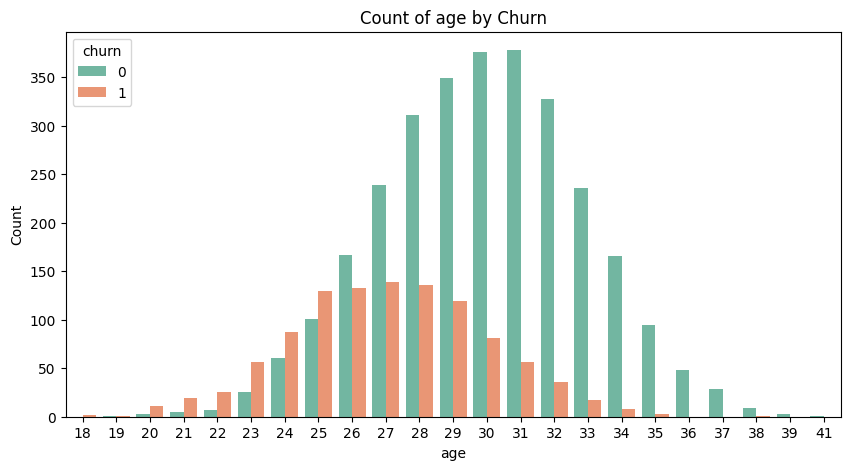

<Figure size 1000x500 with 0 Axes>

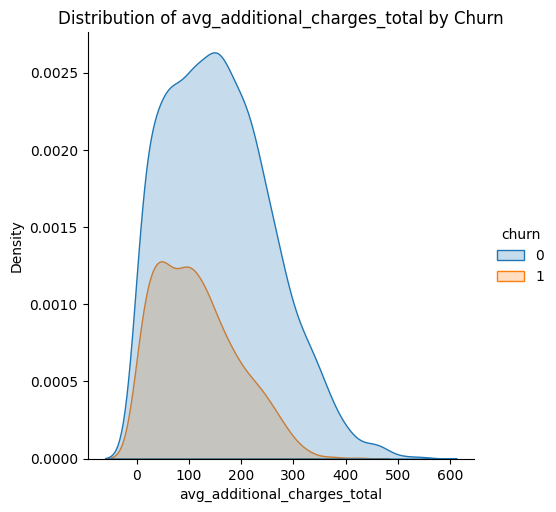

<Figure size 1000x500 with 0 Axes>

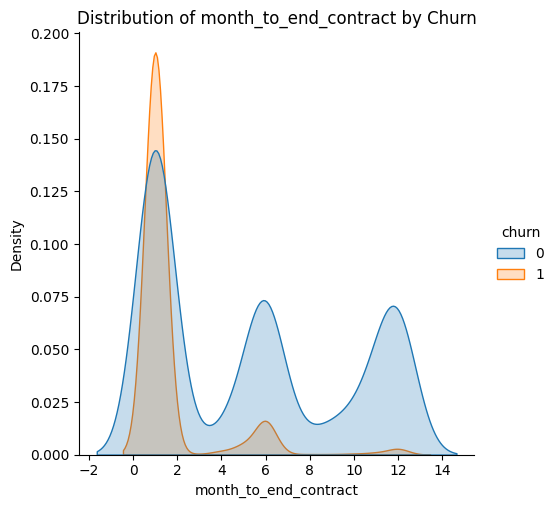

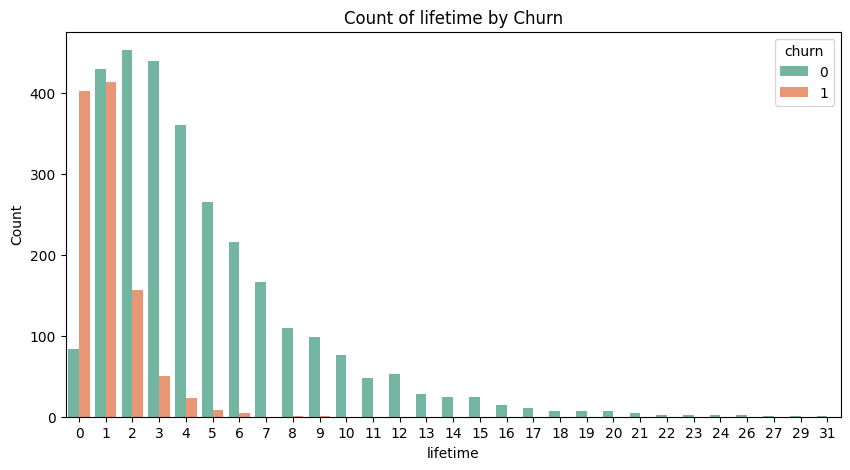

<Figure size 1000x500 with 0 Axes>

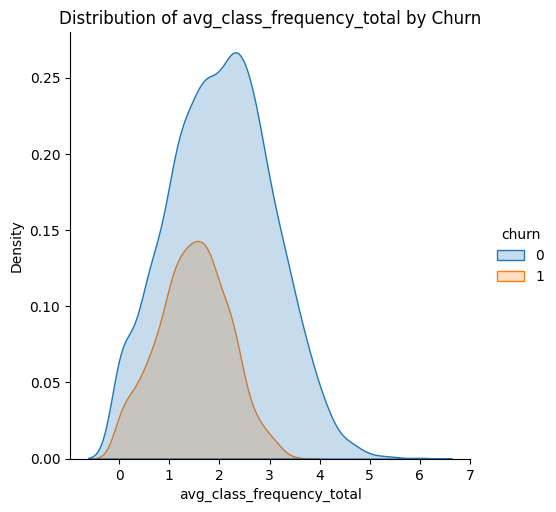

<Figure size 1000x500 with 0 Axes>

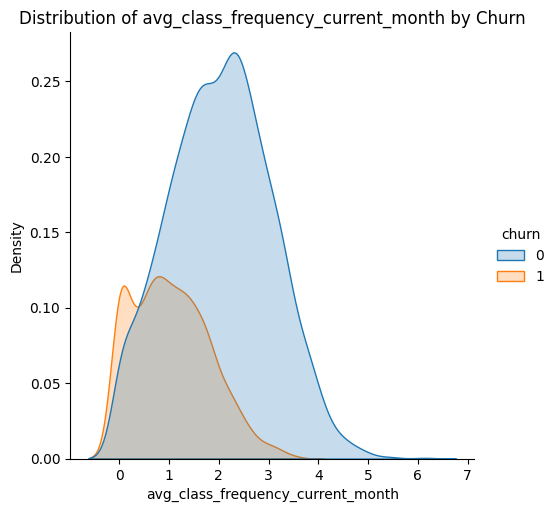

In [14]:
for column in df.columns:
    if column != 'churn':
        plt.figure(figsize=(10, 5))
        
        # Check if column is integer or not
        if df[column].dtype == 'int64':
            # Create countplot to show count of column values by churn
            sns.countplot(data=df, x=column, hue='churn', palette='Set2')
            plt.title(f'Count of {column} by Churn')
            plt.xlabel(column)
            plt.ylabel('Count')
            
        else:
            # Create displot to show distribution of column values by churn
            sns.displot(df, x=column, hue='churn', kind='kde', fill=True)
            plt.title(f'Distribution of {column} by Churn')
            plt.xlabel(column)
            plt.ylabel('Density')
            
plt.show()

insight 7 

Secara keseluruhan hasil yang diperoleh dari grafik diatas seurpa dengan insight yang kita peroleh sebulumnya. Informasi yang lebih jelas dapat dilihat dari grafik ini adalah 
1. rata-rata umur pelanggan yang masih melanjutkan kontrak adalah umur 30 dan 31 
2. rata-rata umur pelanggan yang tidak melanjutkan kontrak adalah umur 27 (rentang umur 26-28)

# Matrix Korelasi Fitur

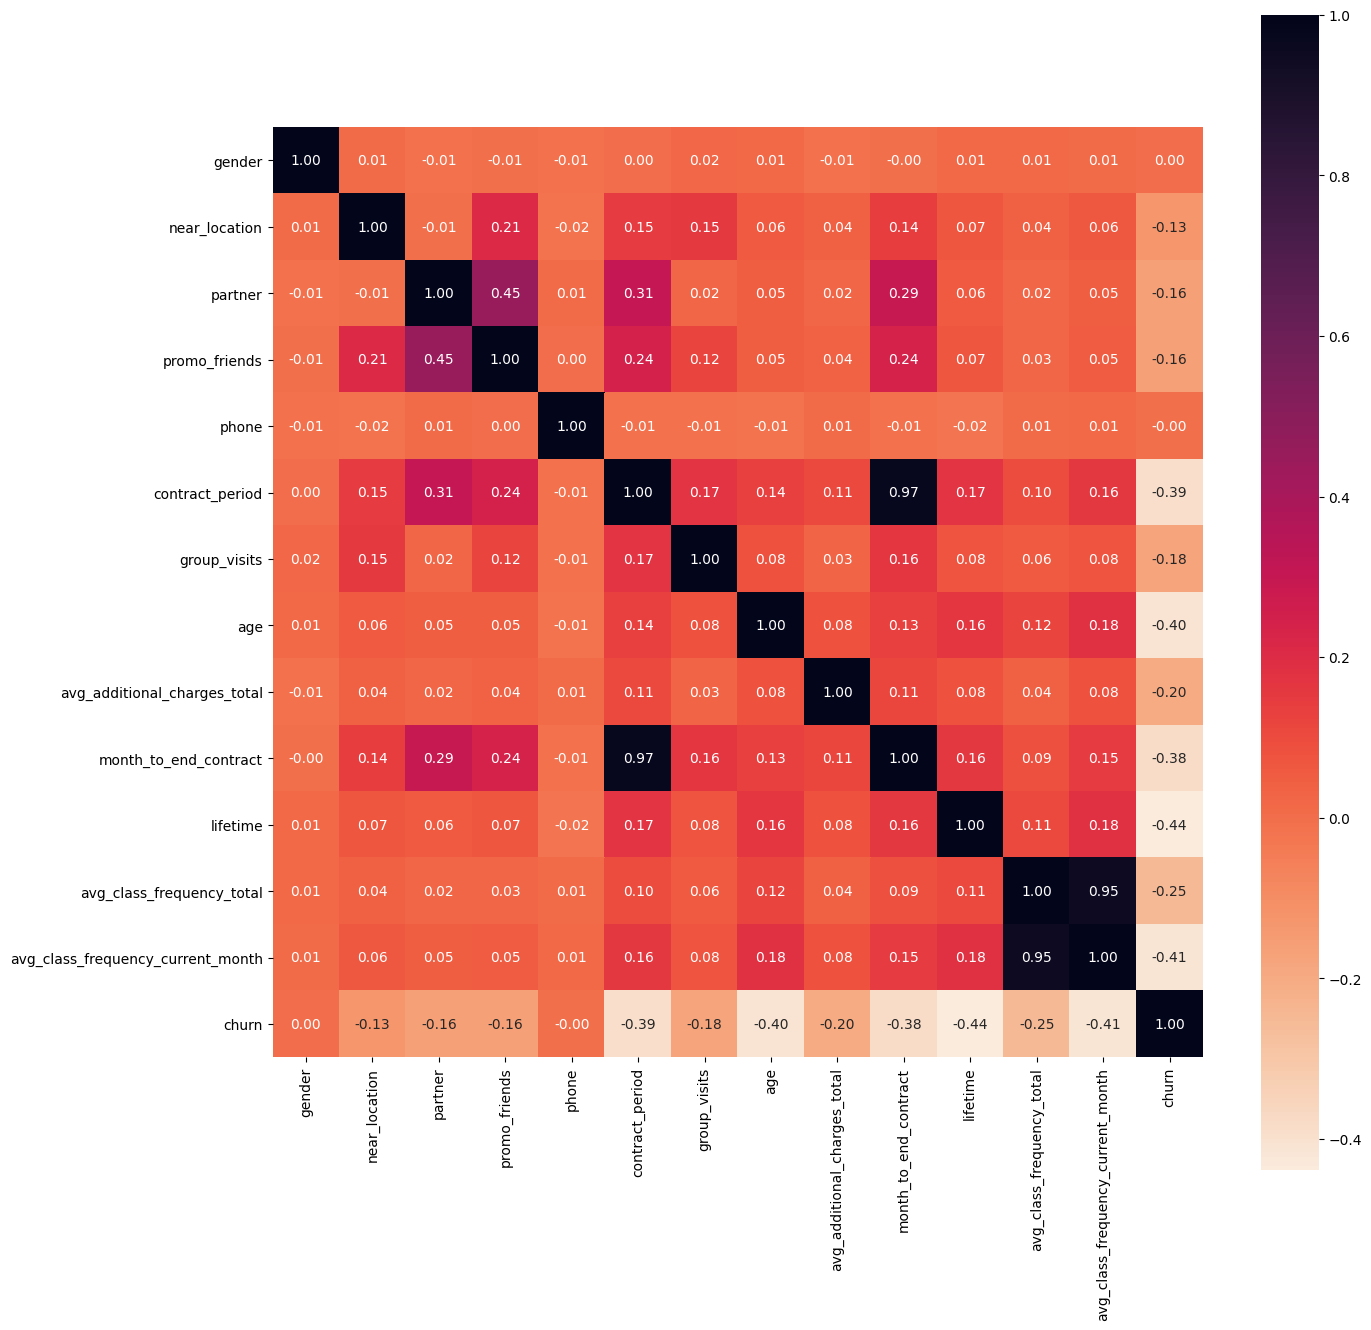

In [15]:
# correlation matrix
corr_feature = df.corr() 
plt.figure(figsize=(15,15))
sns.heatmap(corr_feature, square = True, annot = True, cmap="rocket_r", fmt='.2f')
plt.show()

insight 8 

Berdasarkan hasil heatmap korelasi, ditemukan 2 pasang fitur yang saling berkorelasi yaitu 
1. month_to_end_contract berkorelasi kuat dengan contract_preiod dengan nilai korelasi 0.97
2. avg_class_frequency_currnet_month berkorelasi kuat dengan avg_class_frequency_total dengan nilai korelasi 0.95

# Model Prediksi Churn Bulan Selanjutnya

Mari kita bangun model klasifikasi biner untuk pelanggan di mana fitur targetnya adalah pengguna yang akan pergi bulan depan.

Membagi data ke dalam set latih dan validasi menggunakan fungsi train_test_split().

Melatih model pada set pelatihan dengan dua metode:
1. logistic regression
2. random forest

Mengevaluasi akurasi, presisi, dan recall untuk kedua model menggunakan data validasi.

Parameter random_state ketika membagi data dan mendefinisikan algoritma adalah 0.

# import library prediction

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage 

In [17]:
#membuat fungsi yang akan menghasilkan metrik yang digunakan 
def print_all_metrics(y_true, y_pred, y_proba, title='Metrik klasifikasi'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred))) 

In [18]:
#tinjau rasio churn 
df['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

In [19]:
#bagi data menjadi fitur (matriks X) dan variabel target (y)
X = df.drop('churn', axis=1)
y = df['churn']

In [20]:
#membagi data menjadi training set dan test set = 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
#latih StandardScaler pada training set 
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [22]:
#normalisasi dan standarisasi data training dan test 
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.fit_transform(X_test)

In [23]:
#tetapkan model logistic regresi
lr_model = LogisticRegression(random_state=0) 

#latih model 
lr_model.fit(X_train, y_train)

#buat prediksi menggunakan model yang dilatih 
lr_prediction = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

#menampilkan semua metrik 
print_all_metrics(y_test, lr_prediction, lr_probabilities, title='Metrik untuk Logistic Regression:')

Metrik untuk Logistic Regression:
	Accuracy: 0.26
	Precision: 0.25
	Recall: 1.00


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
#tetapkan model untuk Random Forest
rf_model = RandomForestClassifier(random_state=0, n_estimators=100)

#latih model 
rf_model.fit(X_train, y_train)

#buat prediksi menggunakan model yang dilatih 
rf_prediction = lr_model.predict(X_test)
rf_probabilities = lr_model.predict_proba(X_test)[:,1]

#menampilkan semua metrik 
print_all_metrics(y_test, rf_prediction, rf_probabilities, title='Metrik untuk Random Forest:')

Metrik untuk Random Forest:
	Accuracy: 0.92
	Precision: 0.87
	Recall: 0.81


insight 9 

Berdasarkan metrik yang digunakan untukevaluasi model, diketahui bahwa untuk semua metrik yang digunakan sebagai penentu pada model Random Forest jaug lebih baik dibandingkan dengan Logistic Regression. Walaupun pada metrik recall model Logistic Regression sempurna (bernilai 1) namun 2 metrik yang lainnya menunjukan nilai yang sangat rendah. Oleh sebab itu penelitian menarik kesimpulan bahwasanya model yang cocok untuk permasalahn ini adalah Random Forest

# Klaster Pengguna

In [25]:
def show_cluster_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsiz=(10,10))
    sns.scatterplot(x=df[x_name], y=df[y_name],
                   hue=df[cluster_name], palette ='Paired')
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

In [26]:
#standarisasi terhadap df 
sc = StandardScaler()
x_sc = sc.fit_transform(df.drop('churn',axis=1))

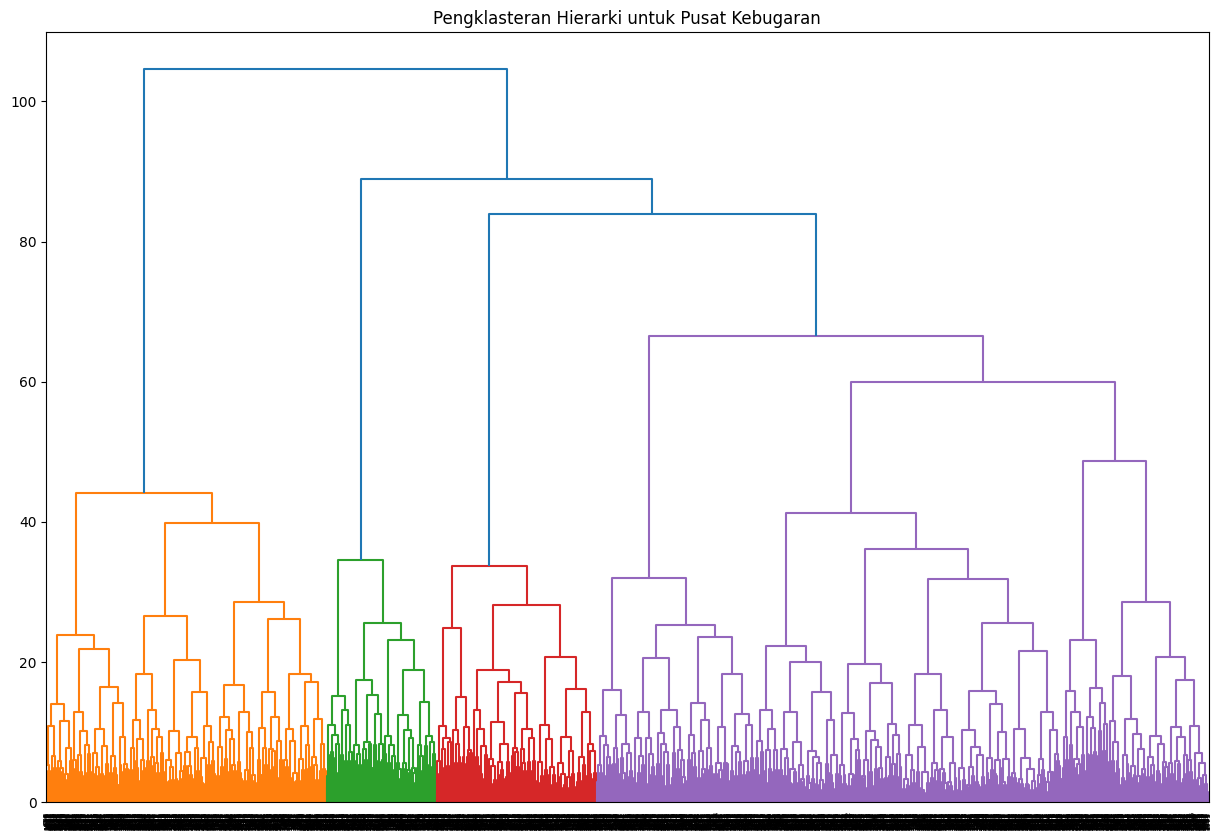

In [27]:
#mebuat visual kluster

linked = linkage(x_sc, method='ward')


plt.figure(figsize=(15,10))
dendrogram(linked, orientation='top')
plt.title('Pengklasteran Hierarki untuk Pusat Kebugaran')
plt.show()

In [28]:
#tetapkan model KMeans dengan n=5
km = KMeans(n_clusters = 5)

#prediksi klaster
labels = km.fit_predict(x_sc)

#simpan label klaster ke kolom datasets kita
df['cluster_km'] = labels

#statistik nilai fitur rata-rata per klaster
df.drop('churn',axis=1).groupby(['cluster_km']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
cluster_km,,,,,,,,,,,,,
0,0.564868,0.847302,0.282434,0.071183,1.0,2.670494,0.448909,30.033295,161.148821,2.470723,4.838117,2.795221,2.787038
1,0.493590,0.948718,0.814103,0.998397,1.0,3.022436,0.435897,29.067308,141.294953,2.831731,3.705128,1.706810,1.598757
2,0.483227,0.723642,0.294728,0.011182,1.0,1.924121,0.276358,28.126997,129.372311,1.830671,2.208466,1.250609,0.997837
3,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967
4,0.500577,0.936563,0.740484,0.480969,1.0,11.833910,0.547866,29.891580,163.330735,10.791234,4.713956,2.001043,1.993460


insight 10 (perhitungan nomor kluster mengikuti index)
1. gender : untuk semua kluster distribusi gender hampir terserbar secara merata 
2. near location : hanya kluster 3 yang tidak memiliki pelanggan yang bekerja atau bertempat tinggal disekitar wilayah fitness
3. partner : kluster 0 dan 2 yang memiliki pelanggan yang sedikit memiliki pelanggan kategori business partner
4. phone : seluruh kluster memiliki pelanggan yang mencantukmkan nomor hp ke bisnis
5. contrac periode = hanya kluster 4 yang memiliki pelanggan rata-rata memiliki contract period 12 bulan. Kluster 2 yang memiliki rata-rata pelanggan dengan skema kontrak 1 bulan 
6. group visit = kluster 2 dan 3 yang memiliki rata-rata pelanggan yang paling rendah mengikuti group visit 
7. age : sebarana umur untuk masing-masing kluster tidak jauh berbeda dengan hasil yang diperoleh sebelumnya berkisar di akhir usia 20-an hingga 30 tahun 
8. average additional charge : kluster 4 memiliki nilai rata-rata tamabahn biaya yang paling tinggi (164 uang) diikuti dengan kluster 0 (162 uang). Kluster 2 merupakan kluster yang paling kecil mengeluarakan tambahan biaya (131 uang)
9.  month to end = dikarenakan kluster 4 memiliki rata-rata pelanggan dengan 12 tahun skema kontrak, maka kluster ini memiliki jarak sisa bulan habis kontrak tertinggi (10 bulan). Berbanding terbalik dengan kluster 2 yang hanya berjarak 1 bulan saja karena skema yang dipilih adalah 1 bulan 
10. lifetime = terlepas dari skema kontrak yang dipilih dari kluster 0, rata-rata lifetime pelanggan pada kluster ini yang tertinggi yakni mencapai 5 bulan. Hal ini turut terjadi pada kluster ke 0 yang mempunyai lifetime 4.7 bulan 
11. class freq total = kluster 0 dan kluster 4 memiliki pelanggan dengan rata-rata mengikuti kelas secara total 2 kali. Kluster lainnya hanya 1 
12. class current month = kluster 0 tetap konstan memiliki pelanggan dengan rata-rata mengikuti kelas 2 kali per minggu pad bulan lalu, begitupun kluster 4. Kluster lainnya hanya 1 

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [30]:
df['cluster_km'].astype('int64')

0       3
1       4
2       2
3       4
4       1
       ..
3995    4
3996    2
3997    4
3998    1
3999    3
Name: cluster_km, Length: 4000, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

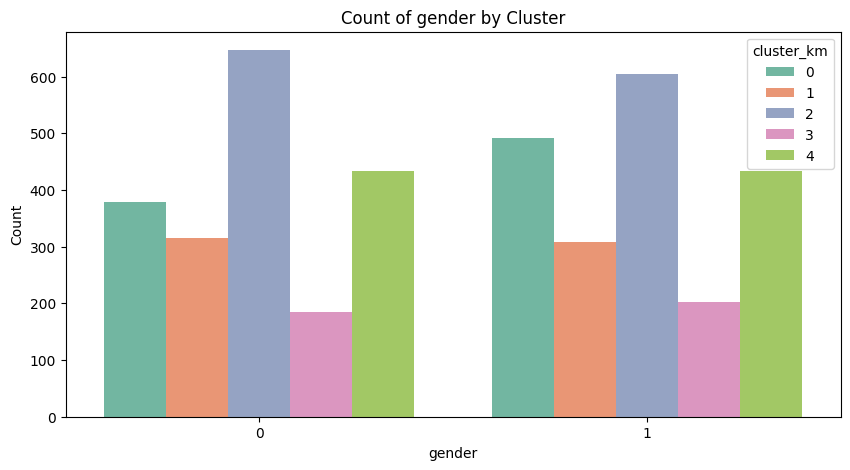

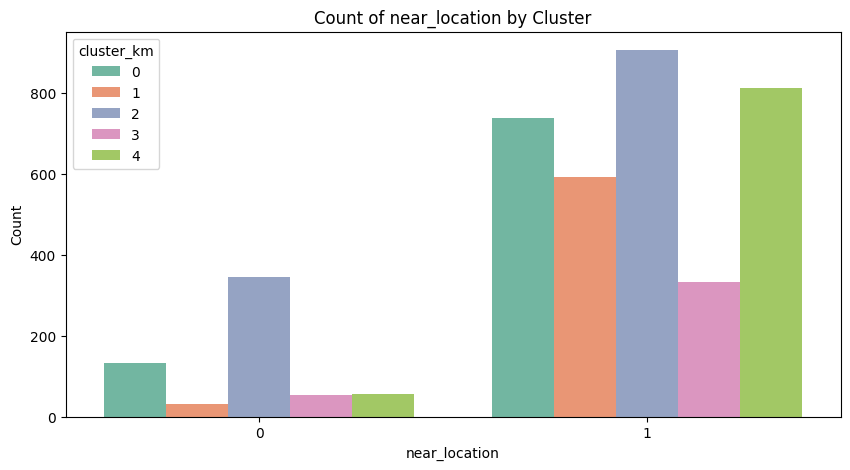

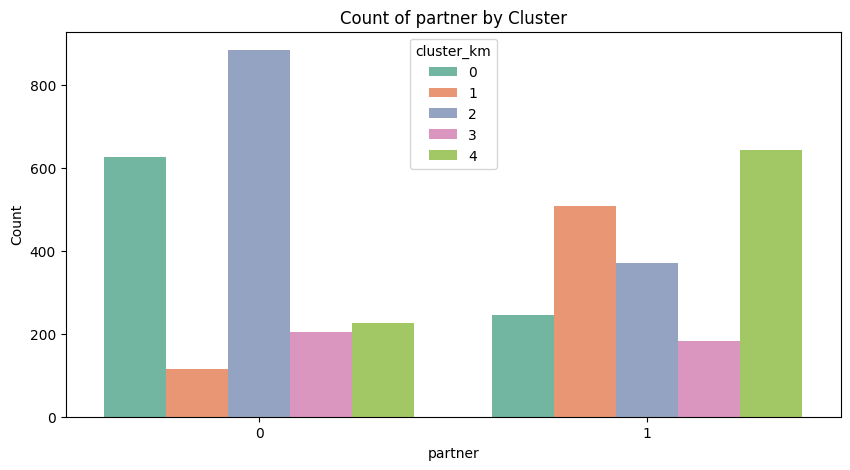

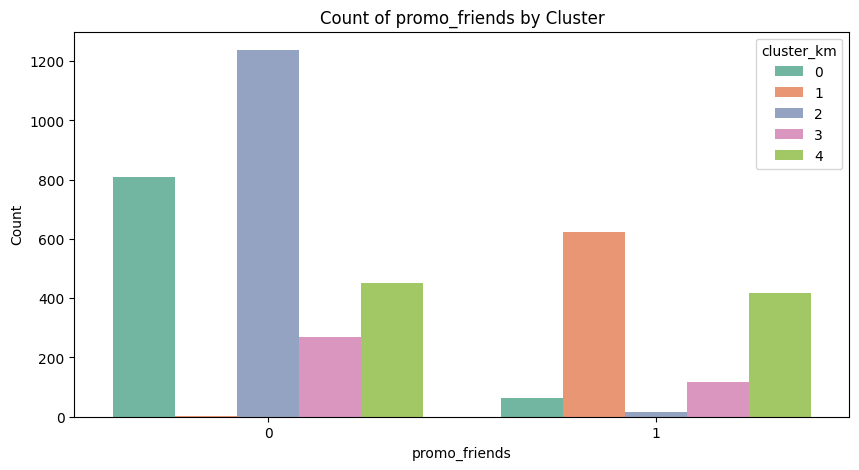

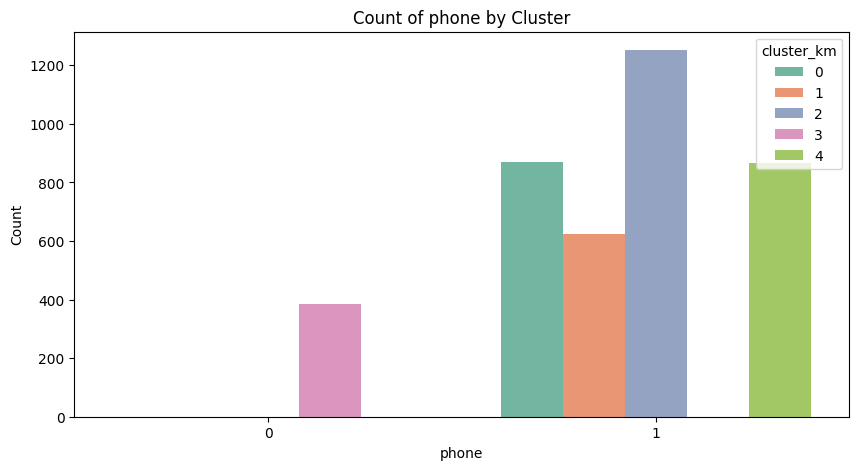

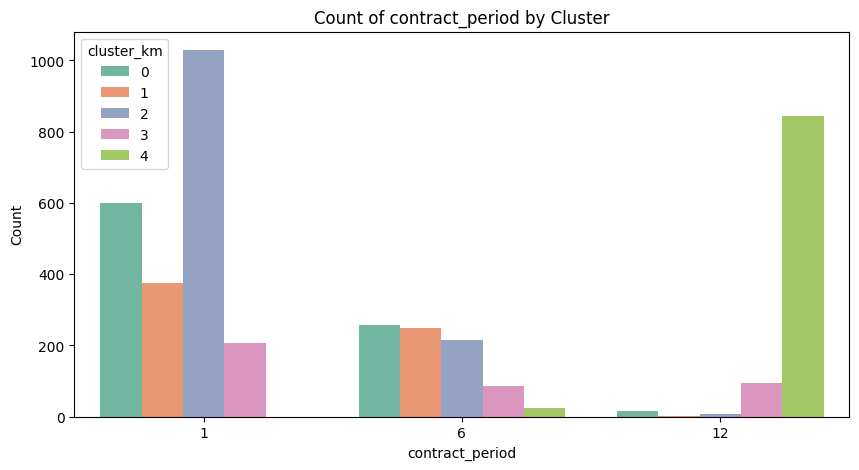

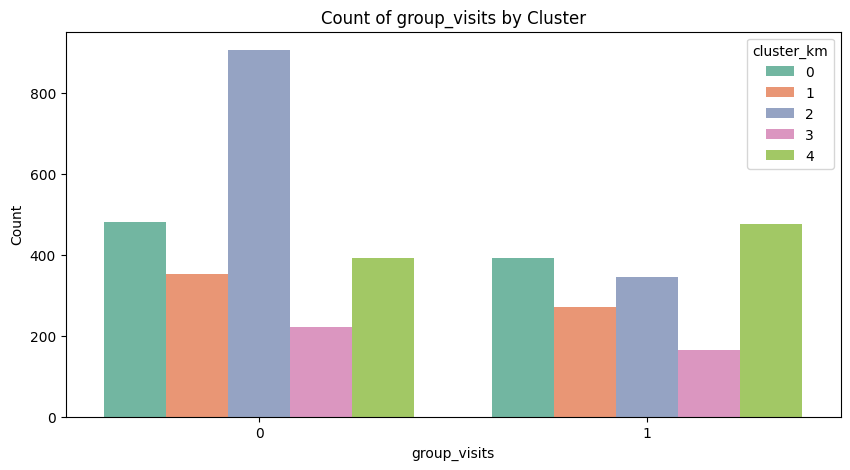

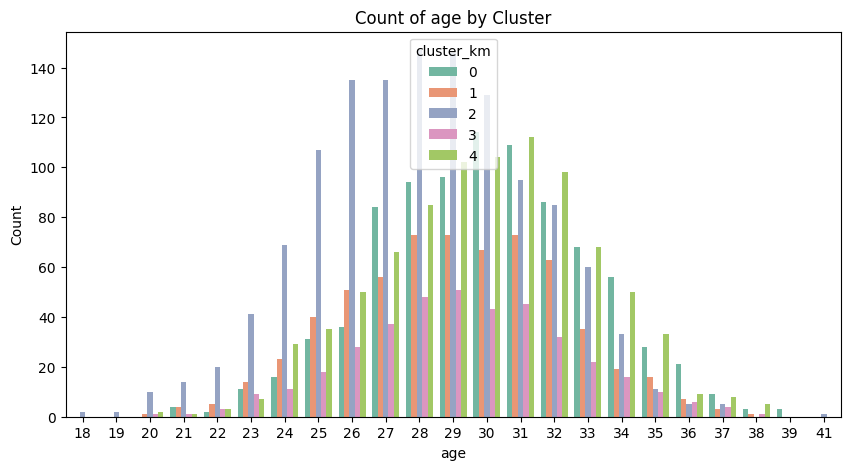

<Figure size 1000x500 with 0 Axes>

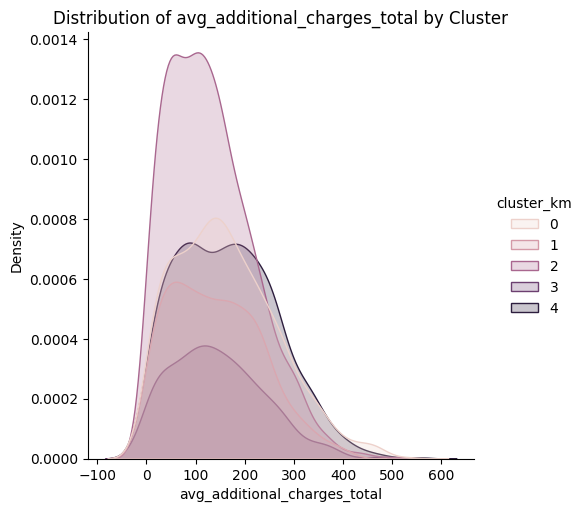

<Figure size 1000x500 with 0 Axes>

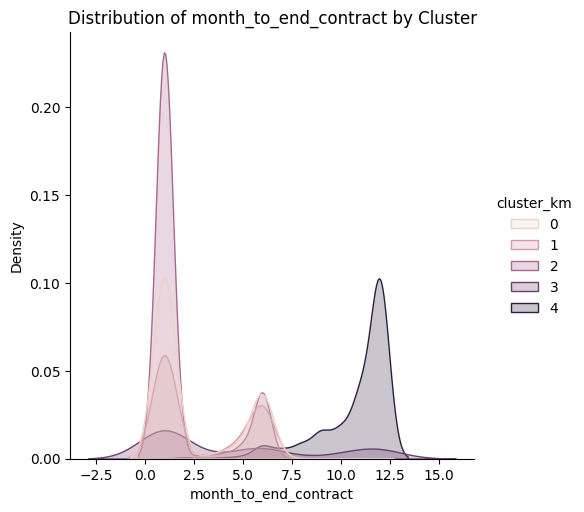

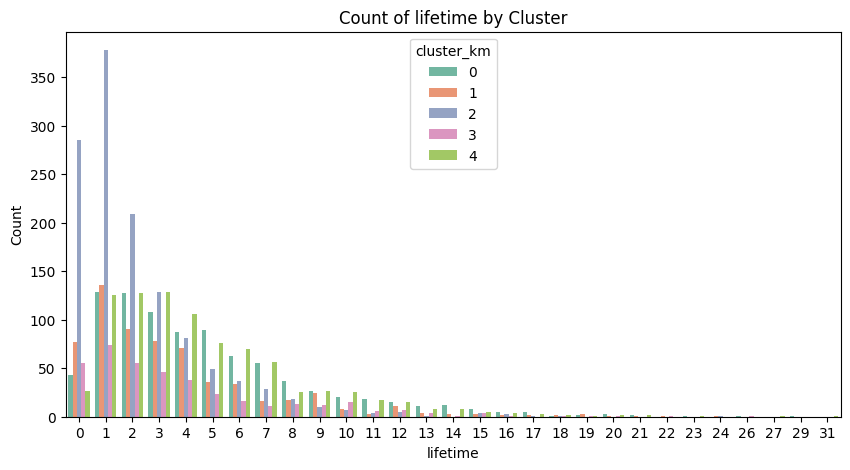

<Figure size 1000x500 with 0 Axes>

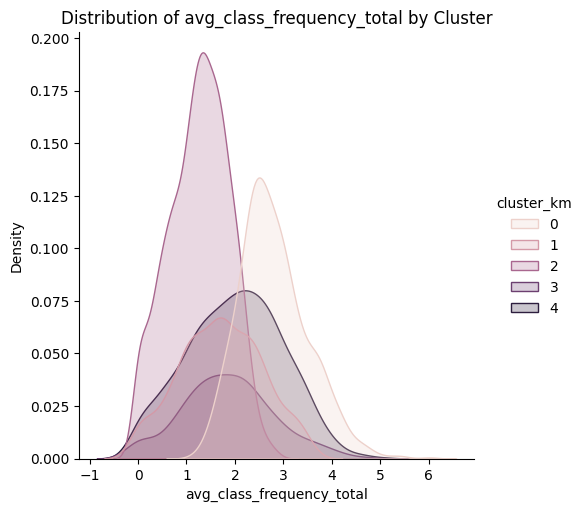

<Figure size 1000x500 with 0 Axes>

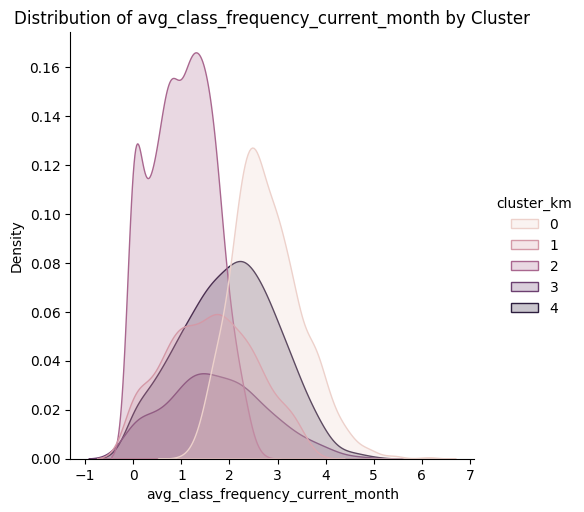

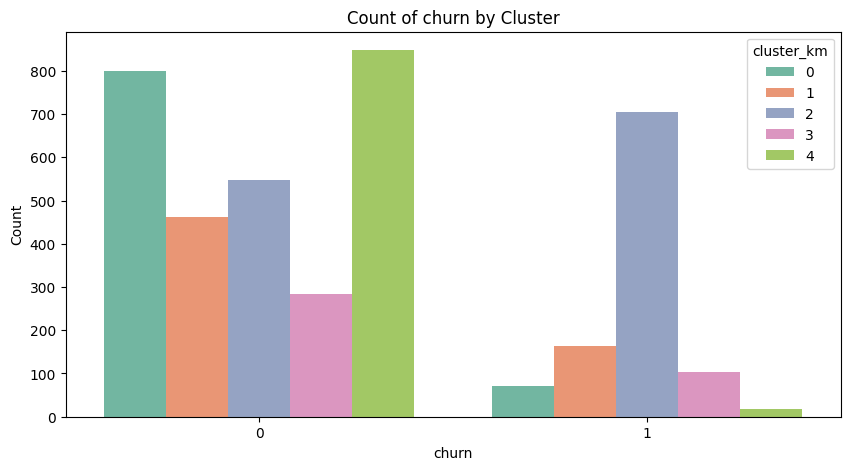

In [33]:
#melihat distribusi data untuk cluster
for column in df.columns:
    if column != 'cluster_km':
        plt.figure(figsize=(10, 5))
        
        # Check if column is integer or not
        if df[column].dtype == 'int64':
            # Create countplot to show count of column values by churn
            sns.countplot(data=df, x=column, hue='cluster_km', palette='Set2')
            plt.title(f'Count of {column} by Cluster')
            plt.xlabel(column)
            plt.ylabel('Count')
            
        else:
            # Create displot to show distribution of column values by churn
            sns.displot(df, x=column, hue='cluster_km', kind='kde', fill=True)
            plt.title(f'Distribution of {column} by Cluster')
            plt.xlabel(column)
            plt.ylabel('Density')
            
plt.show()

insight 11
Berdasarkan hasil sebaran distribusi churn berdasarkan kluster dapat diketahui bahwa 
1. sebaran gender untuk seluruh kelompok kluster hamper serupa 
2. mayoritas customer untuk seluruh kelompok berada di lokasi yang dekat dengan tempat fitness
3. customer pada kluster 2 bukan merupakan business partner, melainkan kluster 4 yang memiliki anggota business partner
4. customer pada kluster 2 mayoritas tidak menggunakan promo teman diawal pendaftaran, melainkan kluster 1 yang menggunakan diskon ini 
5. 4 dari 5 kluster, customernya mencantumkan nomor hp 
6. customer pada kluster 2 mayoritas memilih 1 bulan skema kontrak. Sedangkan kluster 0,1,2 mayoritas memiliki skema 6 bulan kontrak dan kluster 4 memilih skema 12 bulan
7. customer klusetr 2 paling banyak tidak mengikuti kegiatan kelompok, sedangkan kluster 4 yang cukup tinggi mengikuti sesi ini
8. usia 30 mendominasi anggota kluster 0 ; kluster 1 didominasi oleh umum 28,29,31 ; kluster 2 didominasi usia 28 adn 29 ; kluster 3 didominasi usia 29 ; kluster 4 didominasi usia 31
9. 3 dari 5 kluster mengeluarkan biaya kurang dari 100 uang 
10. klsuter 4 yang menampilkan customer dengan sisa sebelum habis kontrak kurang lebih 11 bulan 
11. lifetime 1 bulan banyak menjadi pilihan scenario pada kluster 2
12. customer pada kluster 2 digambarkan hanya melakukan 1 kali kunjungan kelas secara total maupun pad bulan sebelumnya. kluster 0 yang digambarkan melakukan 2 kali kunjuangan kelas 
13. kluster 2 memiliki prediksi terbesar untuk menjadi churn pada bulan berikutnya, dan kluster 4 dan kluster 0 yang paling banyak bertahan (tetap lanjut)

In [63]:
#cluster vs churn 
cluster_churn =df.groupby(['cluster_km', 'churn']).size().unstack(fill_value=0)

cluster_churn

churn,0,1
cluster_km,,
0,800,71
1,461,163
2,547,705
3,283,103
4,848,19


In [57]:
cluster_churn_mean = df.groupby('cluster_km')['churn'].mean()
cluster_churn_mean

cluster_km
0    0.081515
1    0.261218
2    0.563099
3    0.266839
4    0.021915
Name: churn, dtype: float64

Text(0, 0.5, 'Orang')

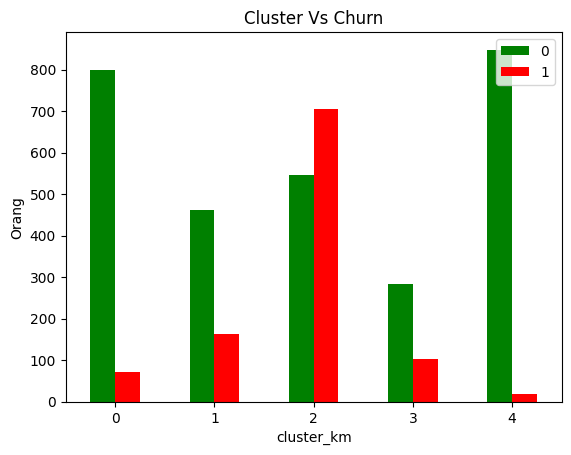

In [83]:
colors = ['green','red']
cluster_churn.plot(kind='bar', rot=0, color=colors)
plt.legend(loc='upper right')
plt.title('Cluster Vs Churn')
plt.ylabel('Orang')

insight 12 

Berdasarkan grafik diatas dapat dilihat bahwa model memprediksi kluster 2 yang akan banyak menjadi Churn untuk bulan selanjutnya, dan lebih baik bisnis mencari dan melakukan pendekatan kepada kluster 0 dan 4. Kedua kluster tersebut diperkirakan akan mempertahankan bisnis dengan ~1600 pelanggan tetap bulan selanjutnya

# Kesimpulan

Tahap Eksplorasi Data 
1. Datasets terdiri dari 4000 datasets dan 14 kolom  
2. Penulisan kolom tidak seragam, maka dilakukan penyegaraman cara penulisan
3. Datasets tidak memiliki missing value maupun duplikasi
4. Peneliti mengasumsikan interpretasi dari nilai 0 dan 1 pada data. Secara umum nilai 0 artinya Tidak dan nilai 1 artinya Iya. Untuk jenis kelamin, nilai 0 adalah perempuan dan 1 adalah laki-laki
5. pelanggan fitness mayoritas laki-laki
6. pelanggan fitness mayoritas memiliki tempat kerja atau tinggal di lokasi yang dekat dengan bisnis
7. selisih pelanggan non-business partner lebih dengan busienss parnert tidak signifikan, waluapun pelanggan non-business partner lebih banyak
8. diawal pendaftaran mayoritas pelanggan mendaftar tidak menggunakan promo friend
9. mayoritas pelanggan mencantumkan nomor telefon
10. lebih banyak pelanggan yang tidak mengikuti kegiatan group
11. mayoritas pelanggan fitness tetap lanjut berlangganan
12. mayoritas pelanggan fitnes berusia akhir tahun 20-an hingga umur 30 tahun
13. mayoritas pelanggan fitness mengeluarkan uang tambahan kurang dari 100-an
14. mayoritas pelanggan memiliki sisa waktu habis kontrak 1 bulan
15. mayoritas pelanggan fitness menghabiskan waktu 1 bulan di tempat fitness
16. lebih dari 800 pelanggan yang tercatat 1-2 kali kunjuan per minggu selama lifetime pelaanggan
17. lebih dari 800 pelanggan yang tercatat 1-2 kali kunjuan per minggu selama bulan lalu
18. mayoritas pelanggan mengambil skema kontrak 1 bulan (2000 orang lebih)

Tahap Churn Vs Non-Churn

1. lebih banyak pelanggan yang memperpanjang kontrak 
2. jenis kelamin terdistribusi hampir setara untuk kedua kelompok 
3. kedua kelompok mayoritas memiliki pelanggan yang berlokasi dekat dengan tempat fitness
4. kedua kelompok mayoritas memiliki pelanggan yang tidak menggunakan promo teman 
5. 53% dari pelanggan yang tetap melanjutkan kontrak termasuk dalam kategori business partner, hanya 35% dari pelanggan yang keluar merupakan kategori ini 
6. kedua kelompok, 90% diantara meletekan nomor hpnya 
7. rata-rata pelanggan yang masih lanjut memilih skenario 6 bulan kontrak, sedangkan yang sudah keluar memiliki skenario 1 bulan kontrak 
8. rata-rata pelanggan kedua kelompok tidak pernah mengikuti sesi kelompok
9. rata-rata pelanggan dari kelompok yang lanjut berusia 30 dan 31 tahun sedangkan yang berhenti 26-28 tahun
10. rata-rata uang yang keluarkan untuk tambahan kelompok yang tetap lanjut jauh lebih tinggi dibandingkan dengan yang stop 
11. rata-rata masa pakai layanan fitness bagi yang lanjut adalah 4.7 bulan sedangkan yang stop 1 bulan
12. rata-rata selama masa hidup (lifetime) pelanggan yang masih lanjut melakukan 2 kali kunjungan per minggu, sedangkan pelanggan yang sudah stop melakukan 1 kali kunjuan perminggu. Hasil yang sama untuk rata-rata kunjungan per minggu sepanjang bulan lalu

Tahapan Korelasi 
1. month_to_end_contract berkorelasi kuat dengan contract_preiod dengan nilai korelasi 0.97
2. avg_class_frequency_currnet_month berkorelasi kuat dengan avg_class_frequency_total dengan nilai korelasi 0.95

Tahapan Model Prediksi:
1. model prediksi Random Forest lebih baik dibandingkan dengan Logistic Regression. Walaupun metric recall Random Forest lebih kecil dibandingkan dengan Logistic Regression (0.81 < 1.00). Namun hasil yang diberikan tetap memuaskan
2. peneliti menggunakan rasio 80:20 untuk train set dan test set

Tahapan Klaster Pengguna 
1. Setelah memvisualisasikan hierarki dari datasets yang dimiliki, ditemukan 5 kluster yang dikelompokan 
2. Kluster 0 dan 4 merupakan kluster pelanggan yang diprediksi tetap bertahan dengan bisniss. Sedangkan kluster 2 yang diprediksi memiliki banyak pelanggan yang akan berhenti berlangganan (churn)



Profil Kluster 0 
- lebih banyak pelanggan laki-laki 
- mayoritas berlokasi dekat dengan lokasi ftness
-mayoritas bukan business partner dari fitness
-mayoritas tidak menggunakan promo teman
- semuanya mencantumkan nomor hp
- mayoritas mengambil skema 1 bulan kontrak layanan fitness
- lebih banyak pelanggan yang tidak mengikuti kegiatan group visit
- mayoritas berusia 30-31 tahun
- mengikuti setidaknya 2 kali sesi kelas per minggu


Profil Kluster 4
- jumlah pelanggan antara wanita dan laki-laki cukup seimbang
- mayoritas berlokasi dekat dengan lokasi ftness
- mayoritas merupakan business partner dari fitness
- jumlah pelanggan yang menggunakan promo teman dengan tidak menggunakan cukup rata
- semuanya mencantumkan nomor hp
- mayoritas mengambil skema 12 bulan kontrak layanan fitness
- lebih banyak pelanggan yang mengikuti kegiatan group visit
- mayoritas berusia 31 tahun
- mengikuti setidaknya 2 kali sesi kelas per minggu

# Rekomendasi 

### Strategi untuk Kluster 0:

1. **Personalisasi Layanan**: Terapkan pendekatan yang lebih personal dengan memahami preferensi dan kebutuhan individual pelanggan. Misalnya, tawarkan paket yang disesuaikan dengan jadwal latihan dan tujuan fitness mereka.

2. **Program Loyalitas**: Buatlah program loyalitas yang menarik untuk mendorong pelanggan untuk memperpanjang kontrak mereka atau merujuk teman-teman mereka. Diskon khusus atau hadiah gratis dapat menjadi insentif yang efektif.

3. **Promosi Berbasis Teknologi**: Manfaatkan nomor hp yang tersedia dengan mengirimkan promosi dan penawaran spesial melalui pesan teks atau aplikasi seluler. Hal ini dapat membantu mempertahankan keterlibatan pelanggan.

4. **Kelas Khusus**: Sediakan kelas-kelas khusus atau pelatihan tambahan yang sesuai dengan minat dan kebutuhan pelanggan. Misalnya, kelas yang difokuskan pada kebugaran tertentu atau kelas yang disesuaikan untuk usia 30-31 tahun.

### Strategi untuk Kluster 4:

1. **Peningkatan Hubungan Bisnis**: Perkuat hubungan dengan pelanggan yang merupakan mitra bisnis dengan menyediakan dukungan tambahan atau pelatihan khusus untuk membantu mereka dalam menjalankan bisnis kebugaran mereka.

2. **Pengembangan Komunitas**: Manfaatkan kegiatan group visit untuk membangun komunitas yang kuat di sekitar pusat kebugaran. Sediakan acara-acara sosial atau kompetisi yang melibatkan anggota secara aktif.

3. **Paket Keluarga**: Tawarkan paket-paket khusus untuk keluarga atau pasangan, dengan harga yang menarik untuk mengakomodasi kebutuhan semua anggota keluarga.

4. **Peningkatan Layanan Tambahan**: Selain kontrak layanan fitness, tambahkan layanan tambahan seperti konsultasi gizi, sesi konseling, atau akses ke program pelatihan online untuk meningkatkan nilai dari keanggotaan mereka.